In [12]:
import pandas as pd
import numpy as np
file_path = "/content/ecommerce_customer_data_custom_ratios.csv"
df = pd.read_csv(file_path)
print(df.head())

   Customer ID        Purchase Date Product Category  Product Price  Quantity  \
0        46251  2020-09-08 09:38:32      Electronics             12         3   
1        46251  2022-03-05 12:56:35             Home            468         4   
2        46251  2022-05-23 18:18:01             Home            288         2   
3        46251  2020-11-12 13:13:29         Clothing            196         1   
4        13593  2020-11-27 17:55:11             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn  
0  Christine Hernandez   37    Male      0  
1  Christine Hernandez   3

In [13]:
df.tail()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
249995,33308,2023-08-10 13:39:06,Clothing,279,2,2187,PayPal,55,1.0,Michelle Flores,55,Male,1
249996,48835,2021-11-23 01:30:42,Home,27,1,3615,Credit Card,42,1.0,Jeremy Rush,42,Female,1
249997,21019,2020-07-02 14:04:48,Home,17,5,2466,Cash,41,0.0,Tina Craig,41,Male,0
249998,49234,2020-12-30 02:02:40,Books,398,2,3668,Crypto,34,0.0,Jennifer Cooper,34,Female,1
249999,16971,2021-03-13 16:28:35,Electronics,425,4,2370,Cash,36,1.0,Justin Lawson,36,Female,1


In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [15]:
df.isnull()


,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,False,False,False,False,False,False,False,False,False,False,False,False,False
249996,False,False,False,False,False,False,False,False,False,False,False,False,False
249997,False,False,False,False,False,False,False,False,False,False,False,False,False
249998,False,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df.isnull().sum()


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47596
Customer Name,0


In [17]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.isnull().sum()


,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [19]:
df['Gender'].value_counts().reset_index()

,Gender,count
0,Female,101798
1,Male,100606


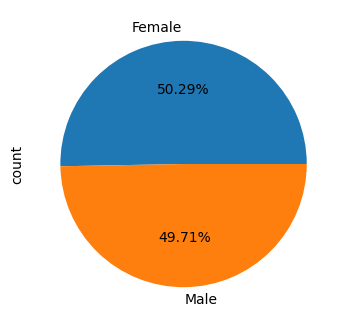

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))

df['Gender'].value_counts().plot(kind='pie', autopct='%1.2f%%')
plt.show()

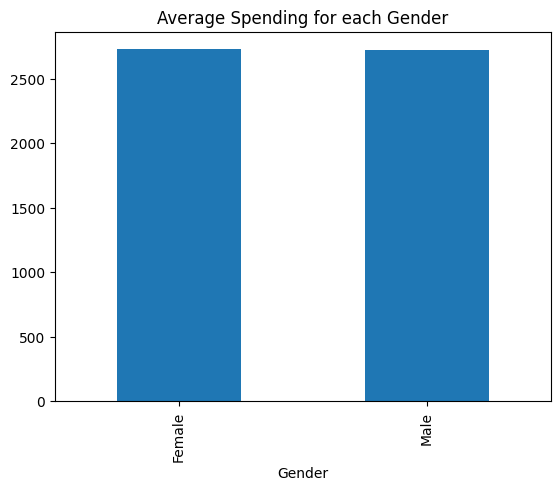

In [27]:
gender_spend = df.groupby('Gender') ['Total Purchase Amount'].mean()
gender_spend.plot.bar()
plt.title("Average Spending for each Gender")
plt.show()

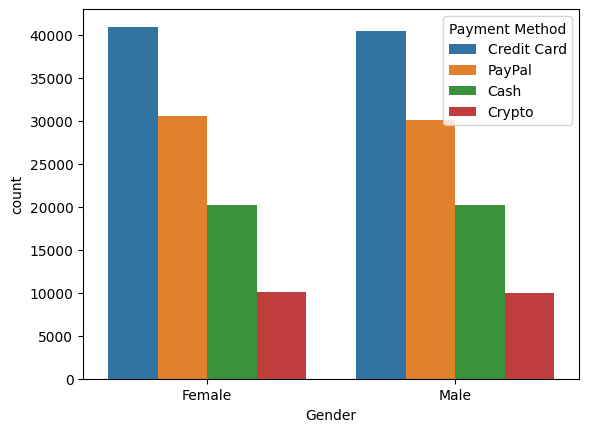

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns # import the seaborn library and alias it as sns

gender_membership = df[['Gender', 'Payment Method']].value_counts().reset_index()
sns.barplot(data=gender_membership, x='Gender', y='count', hue="Payment Method")

plt.show()